In [ ]:
!pip install drawdata

In [2]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

In [3]:
df = widget.data_as_pandas
df.head()

,x,y,color,label
0,152.804873,110.051738,#1f77b4,a
1,138.716956,88.826344,#1f77b4,a
2,136.807507,104.782305,#1f77b4,a
3,140.919303,121.504141,#1f77b4,a
4,154.916853,94.528190,#1f77b4,a


(0.0, 1023.0)

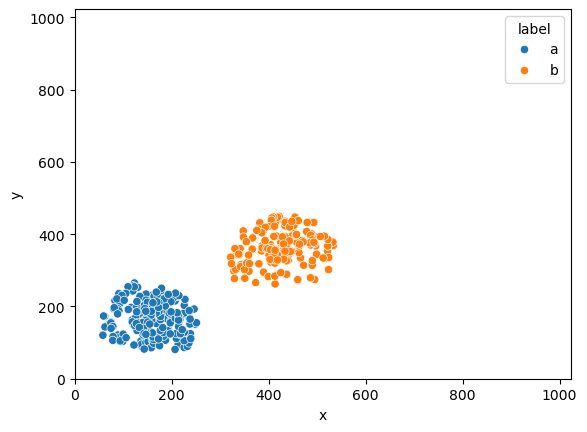

In [31]:
import seaborn as sns

sns.scatterplot(data=df, x='x', y='y', hue='label')
plt.xlim([0,1023])
plt.ylim([0,1023])

In [5]:
label2num = {'a':0, 'b':1}
num2label = {0:'a', 1:'b'}

df["target"] = df["label"].map(label2num)

df.head()

,x,y,color,label,target
0,152.804873,110.051738,#1f77b4,a,0
1,138.716956,88.826344,#1f77b4,a,0
2,136.807507,104.782305,#1f77b4,a,0
3,140.919303,121.504141,#1f77b4,a,0
4,154.916853,94.528190,#1f77b4,a,0


In [6]:
df.tail()

,x,y,color,label,target
351,410.465701,358.318632,#ff7f0e,b,1
352,430.934960,330.878047,#ff7f0e,b,1
353,403.751870,357.113073,#ff7f0e,b,1
354,418.275874,328.614562,#ff7f0e,b,1
355,413.068739,355.544413,#ff7f0e,b,1


In [8]:
X = df[["x","y"]].to_numpy()
y = df['target']

X,y

(array([[152.80487293, 110.05173818],
        [138.71695608,  88.82634363],
        [136.80750678, 104.78230455],
        [140.91930334, 121.50414129],
        [154.91685268,  94.52818963],
        [166.55822426, 111.2551541 ],
        [158.12730651,  86.66190366],
        [138.89424662,  95.93394361],
        [152.90095129, 109.95559336],
        [137.74342226,  95.52770935],
        [146.67458348, 100.05246498],
        [164.2853867 , 112.81178293],
        [151.16034766, 102.68181948],
        [173.16003238, 113.8332598 ],
        [157.73769168,  85.82844022],
        [160.00971538, 106.8938951 ],
        [162.52806786,  98.1762218 ],
        [186.97901321, 106.63265996],
        [174.92690154,  91.37333319],
        [213.30977011,  95.35991915],
        [208.6612692 , 112.30497562],
        [209.79718991, 111.27697546],
        [225.68586268,  86.480837  ],
        [206.83283546,  81.02719774],
        [232.2473691 ,  89.49126763],
        [235.38544971,  98.95980342],
        [225

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=47, train_size=0.2, shuffle=True)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
scaler.mean_, scaler.scale_

(array([260.42879541, 250.20227156]), array([138.62443662, 112.88411394]))

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
#model.add(Dense(Input(shape=(X_train.shape[1],))))
#model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8444 - loss: 0.4318 - val_accuracy: 0.8526 - val_loss: 0.4224
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8733 - loss: 0.4556 - val_accuracy: 0.9123 - val_loss: 0.4184
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9116 - loss: 0.4424 - val_accuracy: 0.9333 - val_loss: 0.4150
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9445 - loss: 0.4339 - val_accuracy: 0.9544 - val_loss: 0.4122
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9406 - loss: 0.4571 - val_accuracy: 0.9684 - val_loss: 0.4098
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9593 - loss: 0.4382 - val_accuracy: 0.9789 - val_loss: 0.4076
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9703 - loss: 0.4246 - val_accuracy: 0.9789 - val_loss: 0.4055
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9891 - loss: 0.4198 - val_accuracy: 0.9860 - val_loss: 0.4036


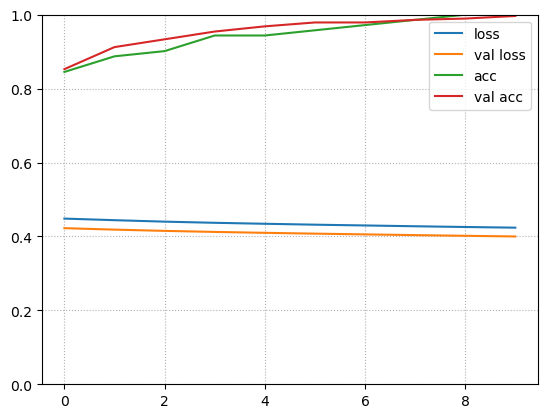

In [26]:
import matplotlib.pyplot as plt

loss_ = history.history['loss']
val_loss_ = history.history['val_loss']

acc_ = history.history['accuracy']
val_acc_ = history.history['val_accuracy']

plt.plot(loss_, label='loss')
plt.plot(val_loss_, label='val loss')
plt.plot(acc_, label='acc')
plt.plot(val_acc_, label='val acc')
plt.ylim([0,1])
plt.legend()
plt.grid(ls=':')


## Export model to tensorflow lite

In [27]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite",'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\MOISES\AppData\Local\Temp\tmptu8gyujk\assets


INFO:tensorflow:Assets written to: C:\Users\MOISES\AppData\Local\Temp\tmptu8gyujk\assets


Saved artifact at 'C:\Users\MOISES\AppData\Local\Temp\tmptu8gyujk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_13')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2639823452304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2639823451728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2639823448272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2639823453264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2639823453072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2639823452880: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [29]:
def convert_to_c_array(tflite_model, filename):
    with open(tflite_model, 'rb') as f:
        tflite_data = f.read()

    with open(filename, 'w') as f:
        f.write('#include <cstdint>\n')
        f.write(f'const unsigned char {tflite_model.replace(".tflite", "")}_tflite[] = {{\n')

        for i, byte in enumerate(tflite_data):
            if i % 12 == 0:
                f.write('\n  ')
            f.write(f'0x{byte:02x}, ')

        f.write('\n};\n')
        f.write(f'const unsigned int {tflite_model.replace(".tflite", "")}_tflite_len = {len(tflite_data)};\n')

# Example usage
convert_to_c_array('model.tflite', 'model.h')

In [34]:
scaler.mean_, scaler.scale_

(array([260.42879541, 250.20227156]), array([138.62443662, 112.88411394]))

In [38]:
import numpy as np

val1 = 400
val2 = 420

val1_scl = (val1 - 260.43)/138.62
val2_scl = (val2 - 250.20)/112.88

array1 = np.array([[val1_scl,val2_scl]])
pred = model.predict(array1)

if pred>0.5:
    print("1")
else:
    print("0")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1
